<a href="https://colab.research.google.com/github/ada06052005/Harshada-Elevate_-labs_-task-7/blob/main/Eleavte_Labs_yask_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/breast-cancer.csv')  # Adjust path if needed
print(df.head())

# Check for nulls
print(df.isnull().sum())

# Drop ID column if exists
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Convert diagnosis to binary (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

# RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


Linear Kernel Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



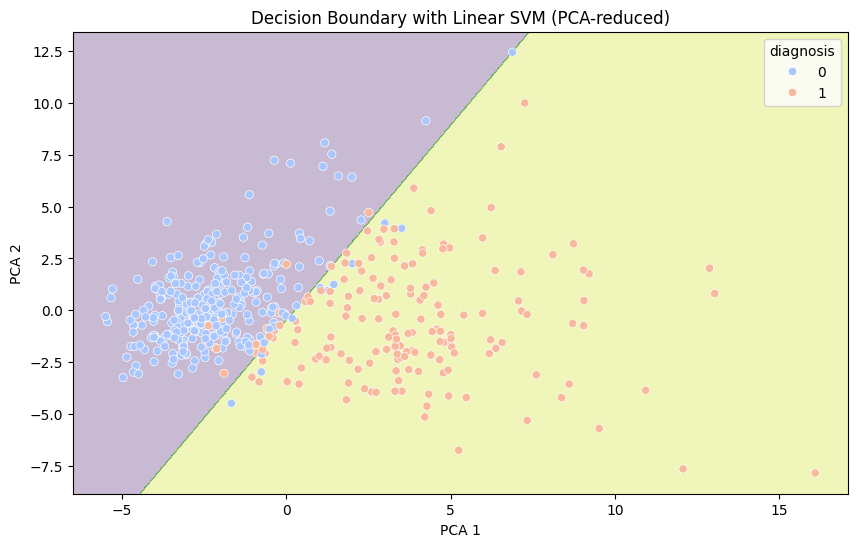

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Train again on 2D data
svm_vis = SVC(kernel='linear', C=1)
svm_vis.fit(X_pca, y_train)

# Create meshgrid
import numpy as np
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='coolwarm')
plt.title("Decision Boundary with Linear SVM (PCA-reduced)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9758241758241759


In [5]:
from sklearn.model_selection import cross_val_score

best_model = grid.best_estimator_
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.97802198 0.96703297 0.98901099 0.98901099 0.95604396]
Average Accuracy: 0.9758241758241759
